In [24]:
import numpy as np
import pandas as pd
import math
import os
import glob
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation

In [25]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [26]:
anger_emotion = os.listdir('/content/gdrive/MyDrive/New data Mar 2023/Anger')
disgust_emotion = os.listdir('/content/gdrive/MyDrive/New data Mar 2023/Disgust')
fear_emotion = os.listdir('/content/gdrive/MyDrive/New data Mar 2023/Fear')
happy_emotion = os.listdir('/content/gdrive/MyDrive/New data Mar 2023/Happy')
sad_emotion = os.listdir('/content/gdrive/MyDrive/New data Mar 2023/Sad')
surprized_emotion = os.listdir('/content/gdrive/MyDrive/New data Mar 2023/Surprized')
neutral_emotion = os.listdir('/content/gdrive/MyDrive/New data Mar 2023/neutral')

In [27]:
emotion_count_data = {
    'emotion': ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprized', 'Neutral'],
    'emotion_count': [len(anger_emotion), len(disgust_emotion), len(fear_emotion), len(happy_emotion), len(sad_emotion), len(surprized_emotion), len(neutral_emotion)]    
}

In [28]:
emotion_count_dataframe = pd.DataFrame(emotion_count_data)
print(emotion_count_dataframe)

     emotion  emotion_count
0      Anger             75
1    Disgust            273
2       Fear            219
3      Happy            146
4        Sad            281
5  Surprized            278
6    Neutral            195


## Data Visualization

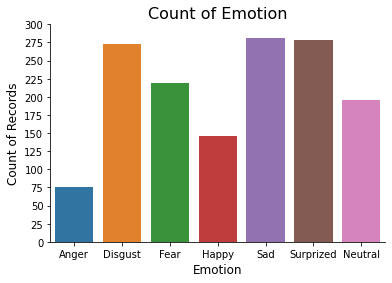

In [ ]:
plt.title('Count of Emotion', size = 16)
count_plot = sns.barplot(x = emotion_count_dataframe.emotion, y = emotion_count_dataframe.emotion_count, data = emotion_count_dataframe)
plt.xlabel('Emotion', size = 12)
plt.ylabel('Count of Records', size = 12)
count_plot.set_yticks(range(0, 325, 25))
sns.despine(top = True, right = True)
plt.show()

In [ ]:
def plot_waveform(data, emotion):
  plt.figure(figsize = (12, 3))
  plt.title('Waveplot: \'{}\' Emotion'.format(emotion), size = 16)
  librosa.display.waveshow(data)
  plt.show()

def plot_spectrogram(data, emotion):
  x = librosa.stft(data)
  x_dB = librosa.amplitude_to_db(abs(x))
  plt.figure(figsize = (12, 3))
  plt.title('Spectrogram: \'{}\' Emotion'.format(emotion), size = 16)
  librosa.display.specshow(x_dB)
  plt.show()

In [ ]:
emotion = 'Anger'
path = os.path.join('/content/gdrive/MyDrive/New data Mar 2023/Anger', anger_emotion[1])
data, sampling_rate = librosa.load(path)
plot_waveform(data, emotion)
plot_spectrogram(data, emotion)
Audio(path)

Output hidden; open in https://colab.research.google.com to view.

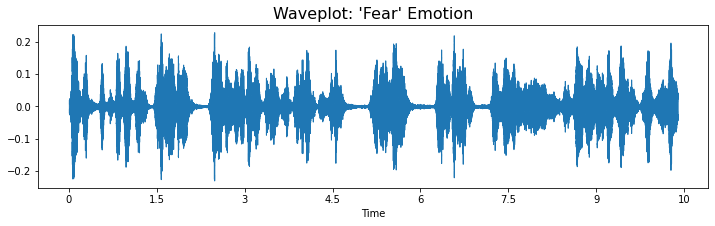

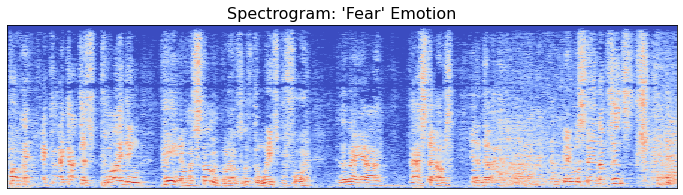

In [ ]:
emotion = 'Fear'
path = os.path.join('/content/gdrive/MyDrive/New data Mar 2023/Fear', fear_emotion[1])
data, sampling_rate = librosa.load(path)
plot_waveform(data, emotion)
plot_spectrogram(data, emotion)
Audio(path)

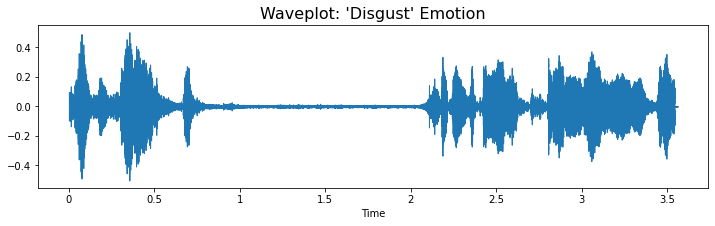

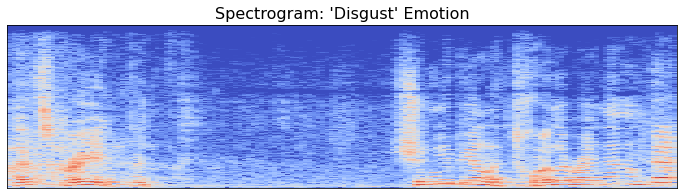

In [ ]:
emotion = 'Disgust'
path = os.path.join('/content/gdrive/MyDrive/New data Mar 2023/Disgust', disgust_emotion[1])
data, sampling_rate = librosa.load(path)
plot_waveform(data, emotion)
plot_spectrogram(data, emotion)
Audio(path)

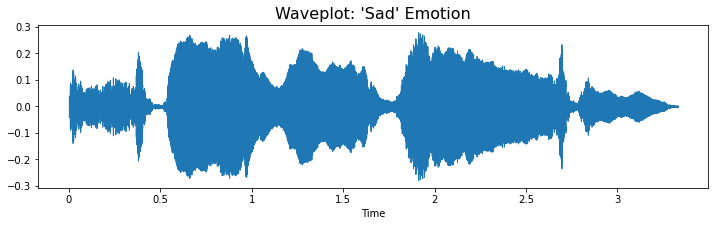

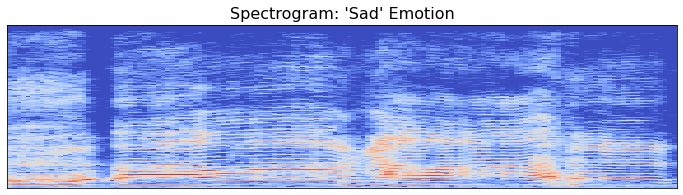

In [ ]:
emotion = 'Sad'
path = os.path.join('/content/gdrive/MyDrive/New data Mar 2023/Sad', sad_emotion[1])
data, sampling_rate = librosa.load(path)
plot_waveform(data, emotion)
plot_spectrogram(data, emotion)
Audio(path)

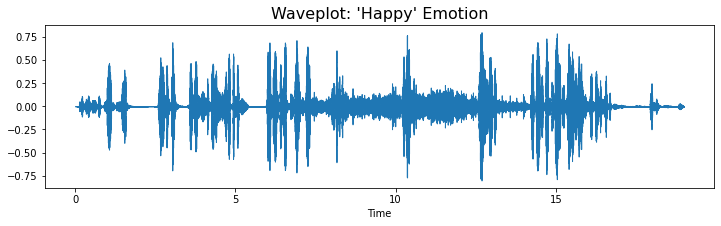

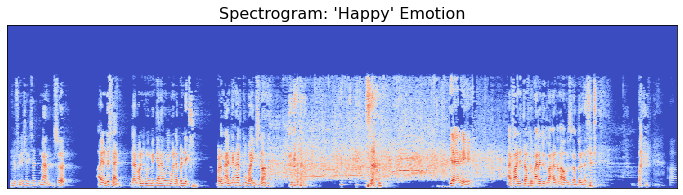

In [ ]:
emotion = 'Happy'
path = os.path.join('/content/gdrive/MyDrive/New data Mar 2023/Happy', happy_emotion[1])
data, sampling_rate = librosa.load(path)
plot_waveform(data, emotion)
plot_spectrogram(data, emotion)
Audio(path)

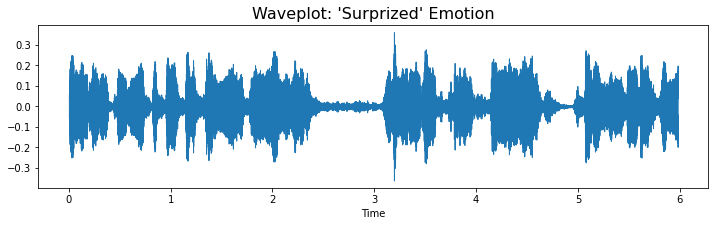

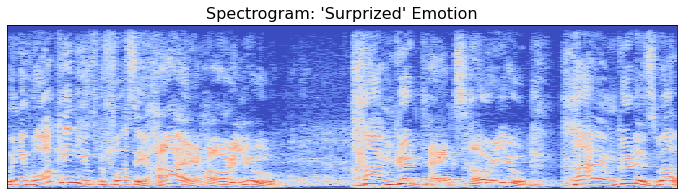

In [ ]:
emotion = 'Surprized'
path = os.path.join('/content/gdrive/MyDrive/New data Mar 2023/Surprized', surprized_emotion[1])
data, sampling_rate = librosa.load(path)
plot_waveform(data, emotion)
plot_spectrogram(data, emotion)
Audio(path)

In [ ]:
emotion = 'Neutral'
path = os.path.join('/content/gdrive/MyDrive/New data Mar 2023/neutral', neutral_emotion[1])
data, sampling_rate = librosa.load(path)
plot_waveform(data, emotion)
plot_spectrogram(data, emotion)
Audio(path)

Output hidden; open in https://colab.research.google.com to view.

## Data Augmentation

In [29]:
def white_noise(signal, SNR):
  RMS_signal = math.sqrt(np.mean(signal ** 2))
  RMS_noise = math.sqrt(RMS_signal ** 2 / (pow(10, SNR / 10)))
  noise = np.random.normal(0, RMS_noise, signal.shape[0])
  return noise

def stretch(signal):
  return librosa.effects.time_stretch(signal, rate = 0.8)

def pitch(signal, sampling_rate):
  return librosa.effects.pitch_shift(signal, sr = sampling_rate, n_steps = 2)

def shift(signal):
  time_shift = int(np.random.uniform(low = -5, high = 5) * 1000)
  return np.roll(signal, time_shift)

path = os.path.join('/content/gdrive/MyDrive/New data Mar 2023/Surprized', surprized_emotion[1])
signal, sampling_rate = librosa.load(path)

### Original Audio

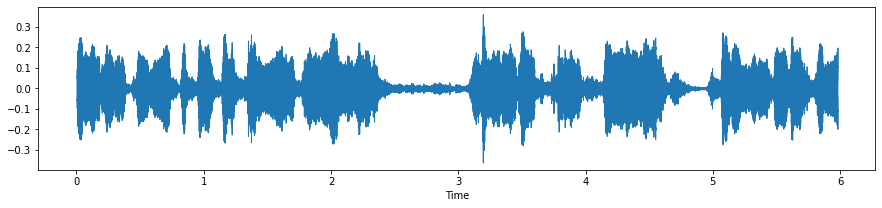

In [ ]:
plt.figure(figsize = (15, 3))
librosa.display.waveshow(y = signal, sr = sampling_rate)
Audio(path)

## Data Augmentation

White Noise Injection


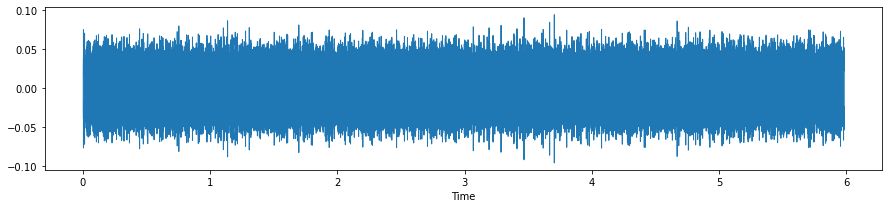

In [ ]:
print('White Noise Injection')
noisy_data = white_noise(signal, 10)
plt.figure(figsize = (15, 3))
librosa.display.waveshow(y = noisy_data, sr = sampling_rate)
Audio(noisy_data, rate = sampling_rate)
# plt.show()

Time Shifting


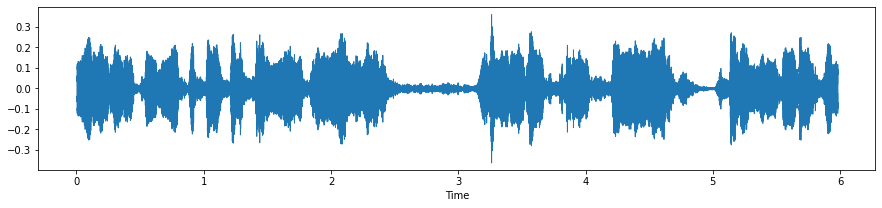

In [ ]:
print('Time Shifting')
shifted_data = shift(signal)
plt.figure(figsize = (15, 3))
librosa.display.waveshow(y = shifted_data, sr = sampling_rate)
Audio(shifted_data, rate = sampling_rate)

Time Stretching


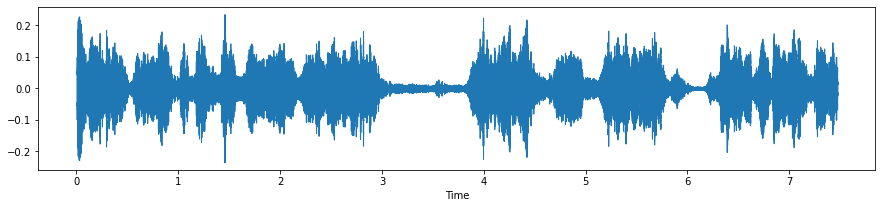

In [ ]:
print('Time Stretching')
stretched_data = stretch(signal)
plt.figure(figsize = (15, 3))
librosa.display.waveshow(y = stretched_data, sr = sampling_rate)
Audio(stretched_data, rate = sampling_rate)

Pitch Shifting


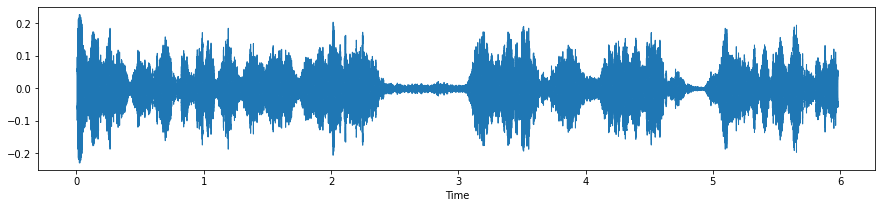

In [ ]:
print('Pitch Shifting')
pitch_shift = pitch(signal, sampling_rate)
plt.figure(figsize = (15, 3))
librosa.display.waveshow(y = pitch_shift, sr = sampling_rate)
Audio(pitch_shift, rate = sampling_rate)

## Feature Extraction

In [ ]:
# def statistical_feature(signal):
#   frequency = np.fft.fftfreq(signal.size)

#   mean_frequency = np.mean(frequency)
#   std_frequency = np.std(frequency)
#   max_amp_frequency = np.amax(frequency)
#   min_amp_frequency = np.amin(frequency)
#   median_frequency = np.median(frequency)
#   skew_frequency = scipy.stats.skew(frequency)
#   kurt_frequency = scipy.stats.kurtosis(frequency)
#   iqr_frequency = scipy.stats.iqr(frequency)

#   return [mean_frequency, std_frequency, max_amp_frequency, min_amp_frequency, median_frequency, skew_frequency, kurt_frequency, iqr_frequency]

In [30]:
def extract_features(signal, sampling_rate):
  stack_result = np.array([])

  zcr = np.mean(librosa.feature.zero_crossing_rate(y = signal))
  # print('ZCR', zcr)
  stack_result = np.hstack((stack_result, zcr))

  mfcc = np.mean(librosa.feature.mfcc(y = signal, sr = sampling_rate, n_mfcc = 40))
  # print('MFCC', mfcc)
  stack_result = np.hstack((stack_result, mfcc))

  stft = np.abs(librosa.stft(signal))
  chroma_stft = np.mean(librosa.feature.chroma_stft(S = stft, sr = sampling_rate))
  # print('Chroma STFT', chroma_stft)
  stack_result = np.hstack((stack_result, chroma_stft))

  mel_spectrogram = np.mean(librosa.feature.melspectrogram(y = signal, sr = sampling_rate))
  # print('Mel Spectrogram', mel_spectrogram)
  stack_result = np.hstack((stack_result, mel_spectrogram))

  rms = np.mean(librosa.feature.rms(y = signal))
  # print('RMS', rms)
  stack_result = np.hstack((stack_result, rms))

  tonnetz_ = np.mean(librosa.feature.tonnetz(y = librosa.effects.harmonic(signal), sr = sampling_rate))
  # print('Tonnetz', tonnetz_)
  stack_result = np.hstack((stack_result, tonnetz_))

  spec_contrast = np.mean(librosa.feature.spectral_contrast(S = stft, sr = sampling_rate))
  # print('Spec Contrast', spec_contrast)
  stack_result = np.hstack((stack_result, spec_contrast))

  spec_centroid = np.mean(librosa.feature.spectral_centroid(y = signal, sr = sampling_rate))
  # print('Spec Centroid', spec_centroid)
  stack_result = np.hstack((stack_result, spec_centroid))

  spec_roll_off = np.mean(librosa.feature.spectral_rolloff(y = signal + 0.01, sr = sampling_rate))
  # print('Spec Rolloff', spec_roll_off)
  stack_result = np.hstack((stack_result, spec_roll_off))

  spec_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y = signal, sr = sampling_rate))
  # print('Spec Bandwidth', spec_bandwidth)
  stack_result = np.hstack((stack_result, spec_bandwidth))

  spec_flatness = np.mean(librosa.feature.spectral_flatness(y = signal))
  # print('Spec Flatness', spec_flatness)
  stack_result = np.hstack((stack_result, spec_bandwidth))

  return stack_result

In [31]:
def get_normal_features(path):
  feature_signal, feature_sampling_rate = librosa.load(path)

  extracted_feature = extract_features(feature_signal, feature_sampling_rate)

  return extracted_feature

In [32]:
def get_stretch_pitch_features(path):
  feature_signal, feature_sampling_rate = librosa.load(path)

  stretched_data = stretch(feature_signal)
  stretch_pitch_data = pitch(feature_signal, sampling_rate)
  result_stretch_pitch_data = extract_features(stretch_pitch_data, feature_sampling_rate)

  return result_stretch_pitch_data

In [33]:
path_emotion_dataframe = pd.DataFrame(columns = ['Path', 'Emotion'])

for i in range(0, len(anger_emotion)):
  path_emotion_dataframe.loc[len(path_emotion_dataframe)] = [os.path.join('/content/gdrive/MyDrive/New data Mar 2023/Anger', anger_emotion[i]), 'Anger']

for i in range(0, len(disgust_emotion)):
  path_emotion_dataframe.loc[len(path_emotion_dataframe)] = [os.path.join('/content/gdrive/MyDrive/New data Mar 2023/Disgust', disgust_emotion[i]), 'Disgust']

for i in range(0, len(fear_emotion)):
  path_emotion_dataframe.loc[len(path_emotion_dataframe)] = [os.path.join('/content/gdrive/MyDrive/New data Mar 2023/Fear', fear_emotion[i]), 'Fear']

for i in range(0, len(happy_emotion)):
  path_emotion_dataframe.loc[len(path_emotion_dataframe)] = [os.path.join('/content/gdrive/MyDrive/New data Mar 2023/Happy', happy_emotion[i]), 'Happy']

for i in range(0, len(sad_emotion)):
  path_emotion_dataframe.loc[len(path_emotion_dataframe)] = [os.path.join('/content/gdrive/MyDrive/New data Mar 2023/Sad', sad_emotion[i]), 'Sad']

for i in range(0, len(surprized_emotion)):
  path_emotion_dataframe.loc[len(path_emotion_dataframe)] = [os.path.join('/content/gdrive/MyDrive/New data Mar 2023/Surprized', surprized_emotion[i]), 'Surprized']

for i in range(0, len(neutral_emotion)):
  path_emotion_dataframe.loc[len(path_emotion_dataframe)] = [os.  path.join('/content/gdrive/MyDrive/New data Mar 2023/neutral', neutral_emotion[i]), 'Neutral']

In [ ]:
# Long execution time; 28 minutes execution time
X_normal, Y_normal = [], []

for path, emotion in zip(path_emotion_dataframe.Path, path_emotion_dataframe.Emotion):
  features = get_normal_features(path)
  X_normal.append(features)
  Y_normal.append(emotion)

normal_feature_dataframe = pd.DataFrame(X_normal, columns =  ['ZCR', 'MFCC', 'Chroma STFT', 'Mel Spectrogram', 'RMS', 'Tonnetz', 'Spectral Contrast',
                                                    'Spectral Centroid', 'Spectral Rolloff', 'Spectral Bandwidth', 'Spectral Flatness'])
normal_feature_dataframe['Labels'] = Y_normal

/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=518
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=898
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=841
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=809
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=405
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=706
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWar

In [38]:
# Long execution time; 30 minutes execution time
X_stretch_pitch, Y_stretch_pitch = [], []

for path, emotion in zip(path_emotion_dataframe.Path, path_emotion_dataframe.Emotion):
  features = get_stretch_pitch_features(path)
  X_stretch_pitch.append(features)
  Y_stretch_pitch.append(emotion)

stretch_pitch_feature_dataframe = pd.DataFrame(X_stretch_pitch, columns =  ['ZCR', 'MFCC', 'Chroma STFT', 'Mel Spectrogram', 'RMS', 'Tonnetz', 'Spectral Contrast',
                                                           'Spectral Centroid', 'Spectral Rolloff', 'Spectral Bandwidth', 'Spectral Flatness'])
stretch_pitch_feature_dataframe['Labels'] = Y_stretch_pitch

/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=518
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=898
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=841
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=809
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=405
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=706
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWar

In [42]:
# Long execution time; 50 minutes execution time 
X_combined, Y_combined = [], []

for path, emotion in zip(path_emotion_dataframe.Path, path_emotion_dataframe.Emotion):
  normal_features = get_normal_features(path)
  stretch_pitch_features = get_stretch_pitch_features(path)
  X_combined.append(normal_features)
  X_combined.append(stretch_pitch_features)
  Y_combined.append(emotion)
  Y_combined.append(emotion)

combined_feature_dataframe = pd.DataFrame(X_combined, columns =  ['ZCR', 'MFCC', 'Chroma STFT', 'Mel Spectrogram', 'RMS', 'Tonnetz', 'Spectral Contrast',
                                                           'Spectral Centroid', 'Spectral Rolloff', 'Spectral Bandwidth', 'Spectral Flatness'])
combined_feature_dataframe['Labels'] = Y_combined

/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=518
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=898
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=841
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=809
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=405
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=706
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWar

In [43]:
# normal_feature_dataframe.to_csv('mean_normal_combined_extracted_features.csv', index = False)
# stretch_pitch_feature_dataframe.to_csv('mean_stretch_pitch_combined_extracted_features.csv', index = False)
combined_feature_dataframe.to_csv('combined_mean_feature_dataframe.csv', index = False)